# 딥러닝 논문의 구조

원본논문 : https://arxiv.org/abs/1512.03385

영상 : https://www.youtube.com/watch?v=ZILIbUvp5lk

ResNet 논문은 `Residual Block`이라는 개념을 도입

### 논문의 형식적 구조

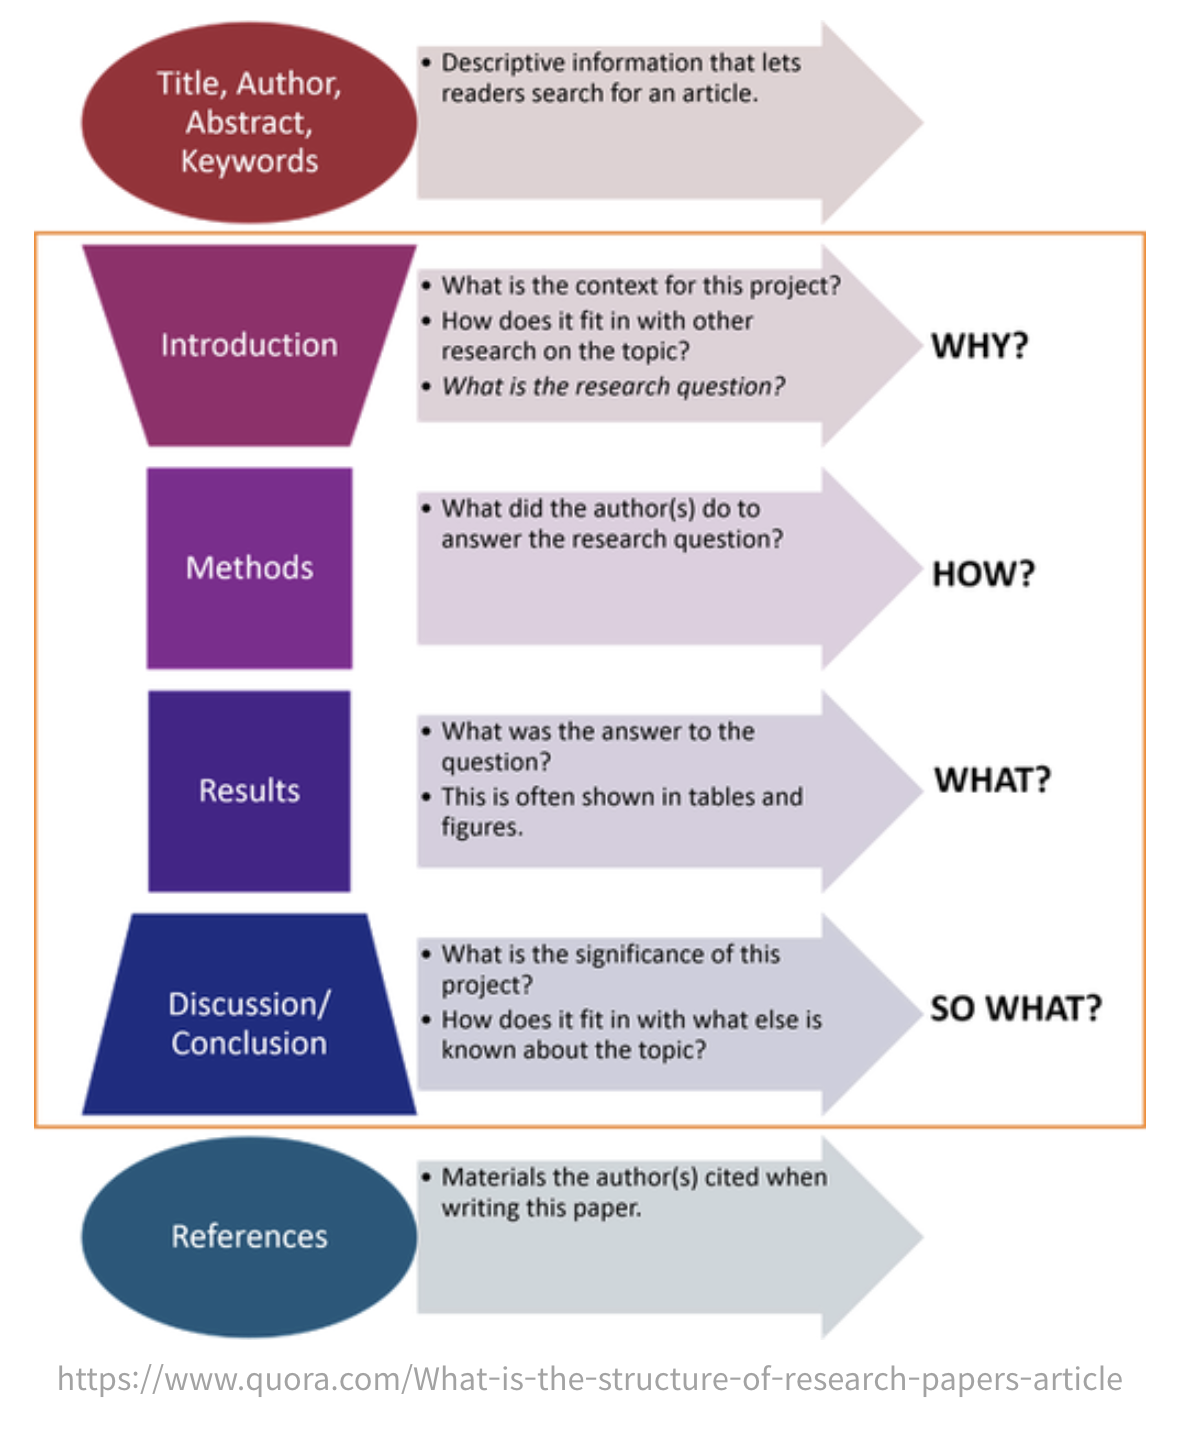

- abstract : 아이디어 제안하는 방식과 논문이 기여하는 점
- introduction, related work : 이론 설명
- experiments : 효과를 확인하기 위한 실험셋팅과 결과
- conclusion : 결론 및 연구내용 요약과 추가적인 연구방향 소개
- reference, appendix : 참고문헌 및 부록, 논문리스트 소개, 본문에서 미처 설명하지 못한 구현이나 추가적인 실험 설명

# ResNet의 핵심개념과 그 효과

## 1. ResNet 논문의 문제인식

### 딥러닝 모델의 레이어를 깊이 쌓으면 항상 성능이 좋아지는가?

- 레이어를 깊이 쌓았을 때 Vanishing/Exploding Gradient 문제가 발생하여 모델의 수렴을 방해하는 문제가 생김.
    - 해결책 : normalized initialization, intermediate normalization layers.
    
    

- `Degradation Problem` : 모델의 수렴을 방해하는 Vanishing/Exploding Gradient 문제와는 달리, 레이어가 깊어질수록 모델이 수렴했음에도 불구하고 레이어가 적을 때보다 모델의 training/test error가 더 커지는 현상발생, 오버피팅 때문이 아니고 네트워크 구조상 레이어를 깊이 쌓았을 때 최적화가 잘 안되기 때문에 발생하는 문제

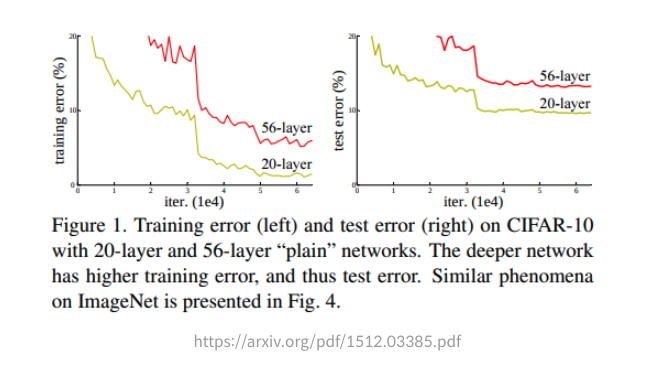

## 2. ResNet 논문이 제시한 솔루션 : Residual Block
- 지름길(shortcut connection)을 통해서 레이어가 입력값을 직접 참조하도록 레이어를 변경
- 앞에서 입력으로 들어온 값을 네트워크의 출력층에 바로 더해준다.
- 네트워크는 출력값에서 원본 입력을 제외한 Residual 함수를 학습

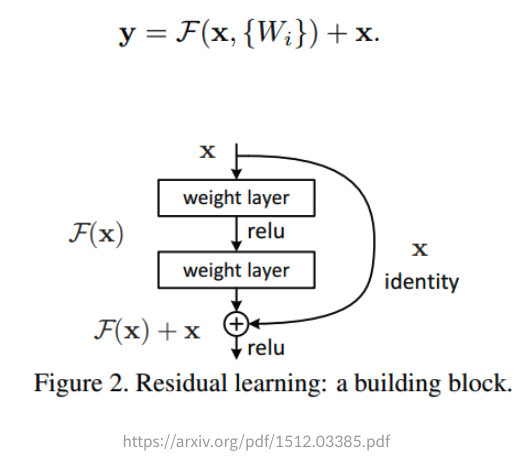

- 학습해야 할 레이어를 아래와 같이 만들면

$$H(x) = F(x)+x$$

$$ \therefore  F(x) = H(x)-x $$

- 이것이 residual 함수

# ResNet 이후 시도 1. Connection을 촘촘하게

DenseNet review : https://hoya012.github.io/blog/DenseNet-Tutorial-1/

## 1. Dense Connectivity

- shortcut connection을 촘촘하게 하면 성능개선

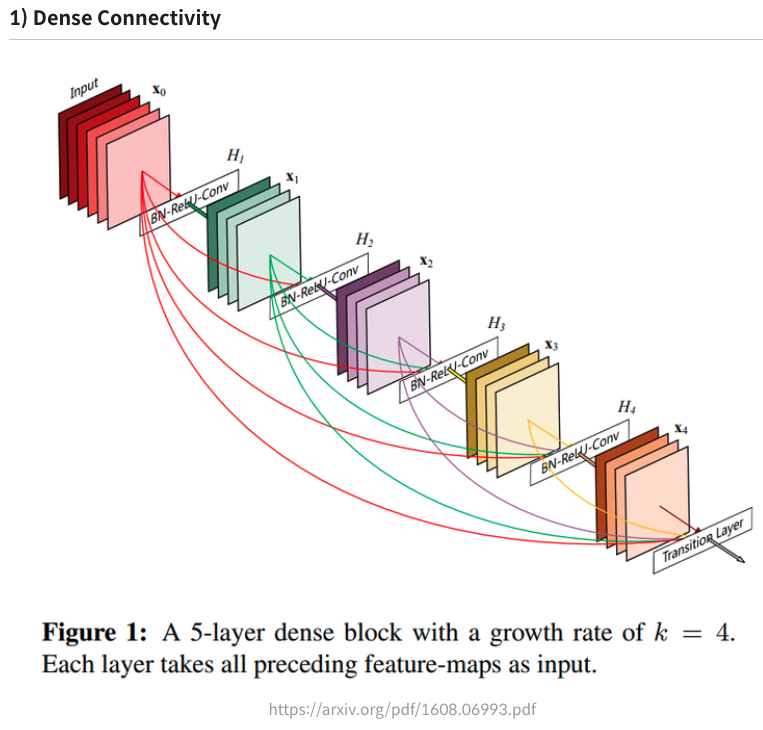

- L개의 레이어가 있을 때 레이어 간 $L(L+1)/2$ 개의 연결을 만든다. 이 연결구조를 "dense connectivity"라고 한다.

$$ X_l = H_l([X_0,X_1,...,X_l-1]) $$

- 위의 식에서 0번째 레이어를 거친 특성맵부터 L-1 번째 레이어를 거친 특성 맵까지를 의미.
- H를 거쳐서 L번째 레이어의 출력값이 된다--> gradient vanishing문제를 개선하고 특성을 계속 재사용

- DenseNet은 하나하나를 차원으로 concatenate하여 하나의 텐셔로 만들어낸다.
- 합성함수 $H_l$ 은 Batch normalization, ReLU, 3x3 컨볼루션 레이어를 통해 [pre-activation](https://m.blog.naver.com/laonple/220793640991) 수행

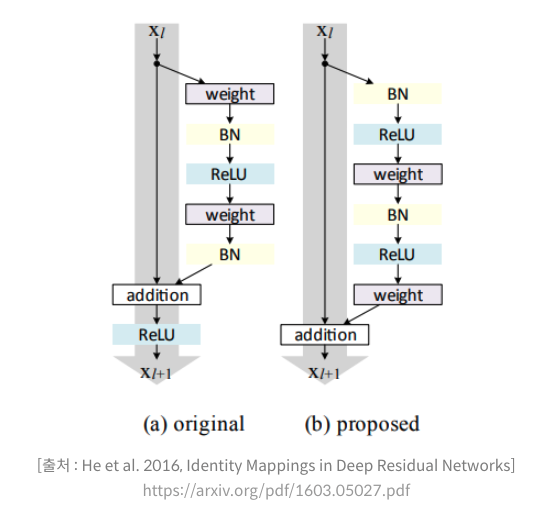

- DenseNet Block의 첫번째 Block에는 21개의 connection.

## 2. Growth Rate

- 특성맵을 더해주던 ResNet과 달리 DenseNet에서는 특성 맵을 채널 방향으로 쌓아서 사용
- 4개의 채널을 가진 CNN 레이어 4개를, DenseNet 블록으로 만들었을 때, 입력값의 채널 개수가 4인 경우 블록 내 각 레이어의 입력값은 몇개의 채널을 갖게 될까?
- 첫번째 레이어 입력값의 채널은 입력 데이터의 채널 그대로 4, 두번째 레이어 입력값은 (입력 데이터 채널+첫번째 레이어 출력값의 채널 4) == 8, 이렇게 네번째 레이어는 같은 방식으로 16개의 특성맵을 입력받는다.

- 이를 제한하기 위해서 growth rate이라는 값을 조정하여 레이어를 거치면서 증가하게 되는 채널의 개수를 조절

- [DenseNet Tutorial 1 Paper Review& Implementation details](https://hoya012.github.io/blog/DenseNet-Tutorial-1/)

In [1]:
# 입력값으로 사용되는 이미지넷 데이터에 3개의 채널이 있고, Dense Block 내에 12개의 conv layer가 있을 때 각 레이어에서 입력받는 채널은 몇개가 될까?


def get_channel_list(input_c, gr):
    channel_list = []
    input_channel = input_c
    growth_rate=gr
    for i in range(12):
        channel_list.append(input_c+gr*i)
    return channel_list

get_channel_list(32,32)

[32, 64, 96, 128, 160, 192, 224, 256, 288, 320, 352, 384]

# ResNet 이후시도 2. 어떤 특성이 중요? : SENet

참고자료 : [원본논문](https://arxiv.org/abs/1709.01507), [정리](https://jayhey.github.io/deep%20learning/2018/07/18/SENet/)


- 일반적인 CNN은 입력에 대해 컨볼루션 필터를 필터사이즈에 따라 적용
- 이때 필터의 개수가 곧 컨볼루션 레이어 출력값의 채널 개수가 된다,
- SqueezeNet에서는 채널 방향으로 global average pooling을 적용, 압축된 정보를 활용하여 중요한 채널이 활성화되도록 한다.
- [참고](https://www.youtube.com/watch?v=6aouXD8WMVQ)

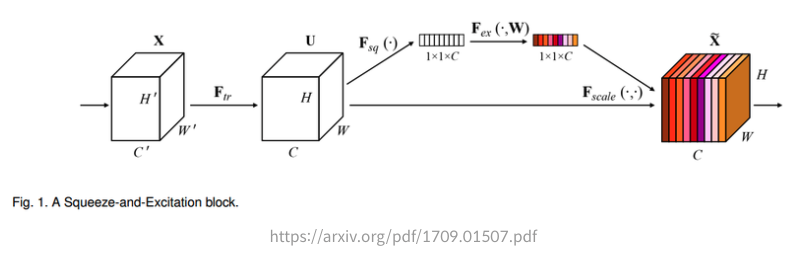

- "Squeeze"는 $F_{sq}$함수에서 일어나고, $F_{tr}$이라는 컨볼루션 레이어를 거쳐 H x W x C의 크기를 가진 특성맵 U가 나온다.
- U에 Squeeze를 적용하면 1 x 1 x C 의 크기가 나오게된다.
- 각 채널별로 딱 1개의 숫자만 남도록 2D 특성맵 전체에 대해 평균값을 남기는 global average pooling을 수행.
- 이 벡터는 채널별 정보를 압축하여 담고 있다.

## 1. Squeeze

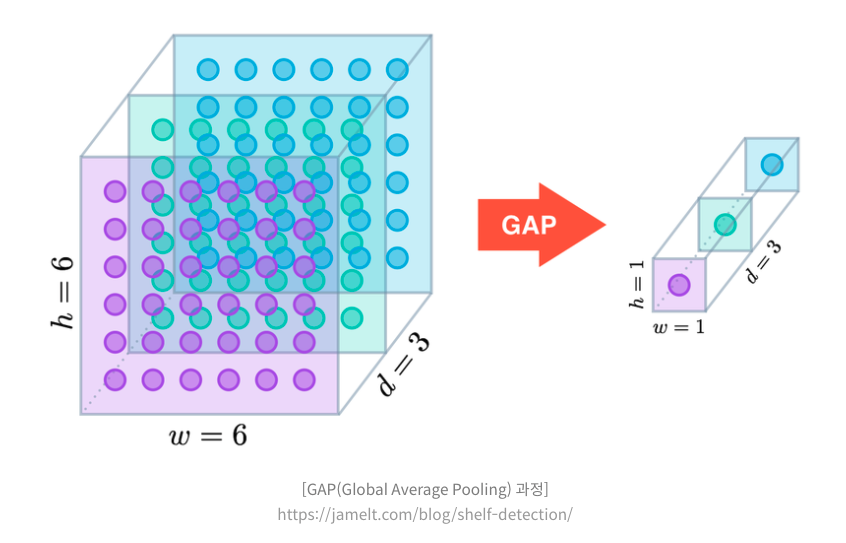

- 특성에서 중요한 정보를 짜내는 과정.
- 풀링을 사용하여 커널영역의 정보를 압축. 최대값 풀링(Max pooling), 평균값 풀링(Average Pooling)

## 2. Excitate
- 채널별 정보를 squeeze했으므로, 이제 정보에 따라 어떤 채널을 강조해야 할지 판단한다.

- 채널을 강조하는 것을 논문에서는 "excitation"으로 표현하며, 수식은 다음과 같다.

$$s = F_{ex}(z,W) = \sigma(g(z,W)) = \sigma(W_2\delta(W_1z))$$

- 1. z는 "squeeze" 활동의 결과물
- 2. 이 특성에 $W_1$을 곱해주는 linear 레이어를 거치고 ReLU 활성화 함수 $\delta$를 거친다.
- 3. 이후 두번째 $W_2$를 곱해주는 linear 레이어를 거치고 마지막으로 sigmoid($\sigma$)활성화함수를 거친다.

이때 sigmoid를 사용하는 이유는 여러 채널들이 서로 다른 정도로 활성화되도록 하기 위함.

- 이렇게 계산된 벡터를 기존의 특성 맵의 채널에 따라서 곱해주어 중요한 채널이 활성화 되도록 만들어 준다.

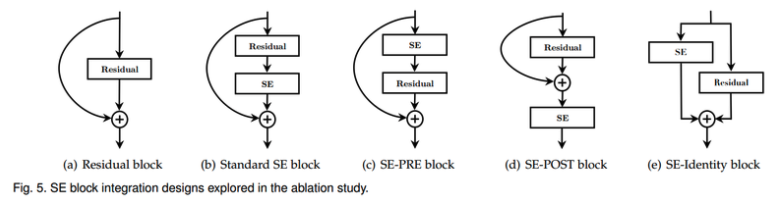